In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
import plotly.graph_objects as go
import matplotlib.colors as mcolors
from statsmodels.graphics.mosaicplot import mosaic

In [62]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

In [63]:
data = pd.read_csv('./titanic_data.csv')

In [64]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [65]:
#data-wrangling
data['Pclass'] = data['Pclass'].map({1: 'upper', 2: 'middle', 3: 'lower'}).astype('category')
data['Survived'] = data['Survived'].map({0: 'died', 1: 'survived'}).astype('category')
data['Family'] = data['SibSp'] + data['Parch'] + 1
data['Sex'] = data['Sex'].astype('category')
data['SibSp'] = data['SibSp'].astype('category')
data['PassengerId'] = data['PassengerId'].astype('category')
data['Embarked'] = data['Embarked'].map({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}).fillna('not known')
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=[0, 12, 18, 59, 120], 
                          labels=['child', 'teen', 'adult', 'senior'])

In [66]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,AgeGroup
0,892,died,lower,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,1,adult
1,893,survived,lower,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,2,adult
2,894,died,middle,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Queenstown,1,senior
3,895,died,lower,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,Southampton,1,adult
4,896,survived,lower,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,Southampton,3,adult


In [67]:
data['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

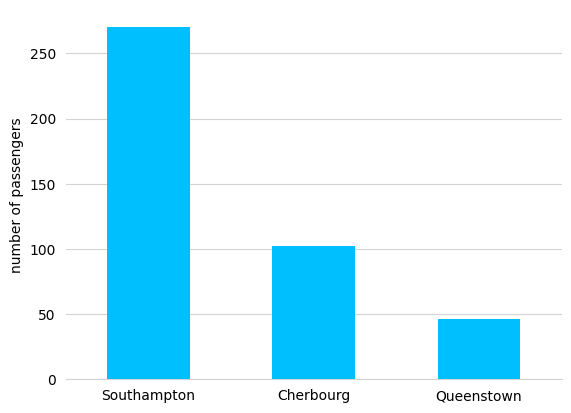

In [68]:
# Calculation
embarked_counts = data['Embarked'].value_counts()

# Plotting
ax = embarked_counts.plot(kind='bar', color='deepskyblue', zorder=3)

plt.xlabel('')
plt.ylabel('number of passengers')
plt.xticks(rotation=0)
ax.grid(True, axis='y', color='lightgrey', zorder=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('lightgrey')

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.savefig('images/amount_vertical.png', bbox_inches='tight')
plt.show()

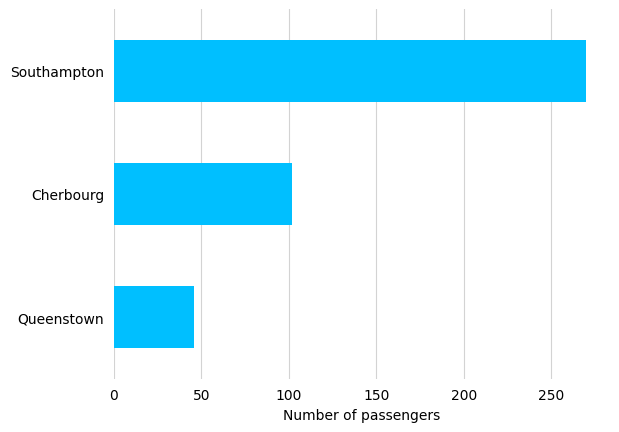

In [69]:
# Calculation
embarked_counts = data['Embarked'].value_counts()

# Plotting
ax = embarked_counts.plot(kind='barh', color='deepskyblue', zorder=3)
ax.invert_yaxis()

ax.grid(True, axis='x', color='lightgrey', zorder=0)
plt.xlabel('Number of passengers')
plt.ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.savefig('images/amount_horizontal.png', bbox_inches='tight')
plt.show()

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/3518330442.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



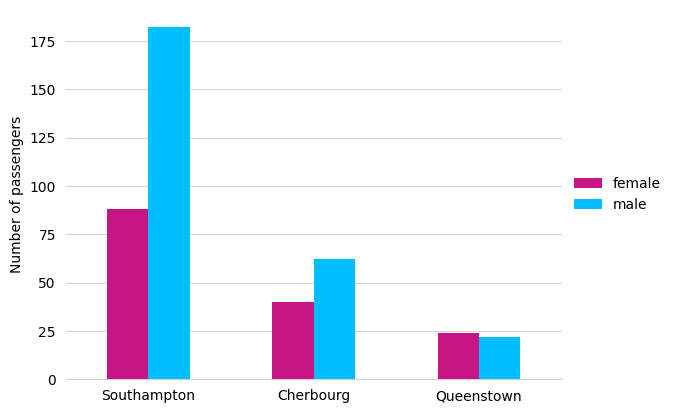

In [70]:
# Calculation
embarked_sex_counts = data.pivot_table(index='Embarked', columns='Sex', aggfunc='size', fill_value=0).reindex(['Southampton', 'Cherbourg', 'Queenstown'])

# Plotting
ax = embarked_sex_counts.plot(kind='bar', zorder=3, color=['mediumvioletred', 'deepskyblue'])

plt.xlabel('')
plt.ylabel('Number of passengers')
plt.xticks(rotation=0)


legend = ax.legend(title='', loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.grid(True, axis='y', color='lightgrey', zorder=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('lightgrey')

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.savefig('images/amount_grouped.png', bbox_inches='tight')
plt.show()

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/2914388914.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



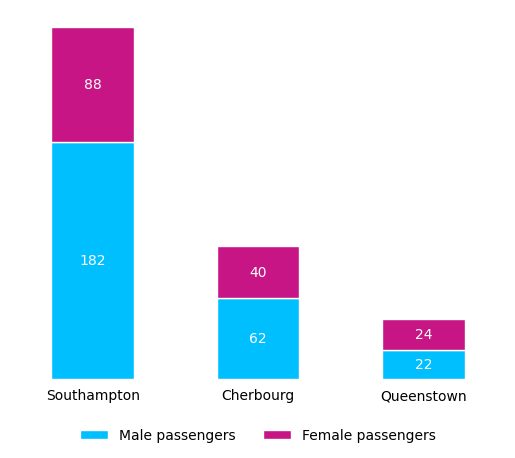

In [71]:
# Calculation
embarked_sex_counts = data.pivot_table(index='Embarked', columns='Sex', aggfunc='size', fill_value=0).reindex(['Southampton', 'Cherbourg', 'Queenstown'])

embarked_sex_counts = embarked_sex_counts[['male', 'female']]

# Plotting
ax = embarked_sex_counts.plot(kind='bar', stacked=True, zorder=3, color=['deepskyblue', 'mediumvioletred'], edgecolor='white')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=10)

plt.xlabel('')
plt.ylabel('number of passengers')
plt.xticks(rotation=0)
ax.grid(True, axis='y', color='lightgrey', zorder=0)
ax.yaxis.set_visible(False)
legend = ax.legend(['Male passengers', 'Female passengers'], title='', loc='upper center', bbox_to_anchor=(0.5, -0.1), frameon=False, ncol=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.savefig('images/amount_stacked.png', bbox_inches='tight')
plt.show()

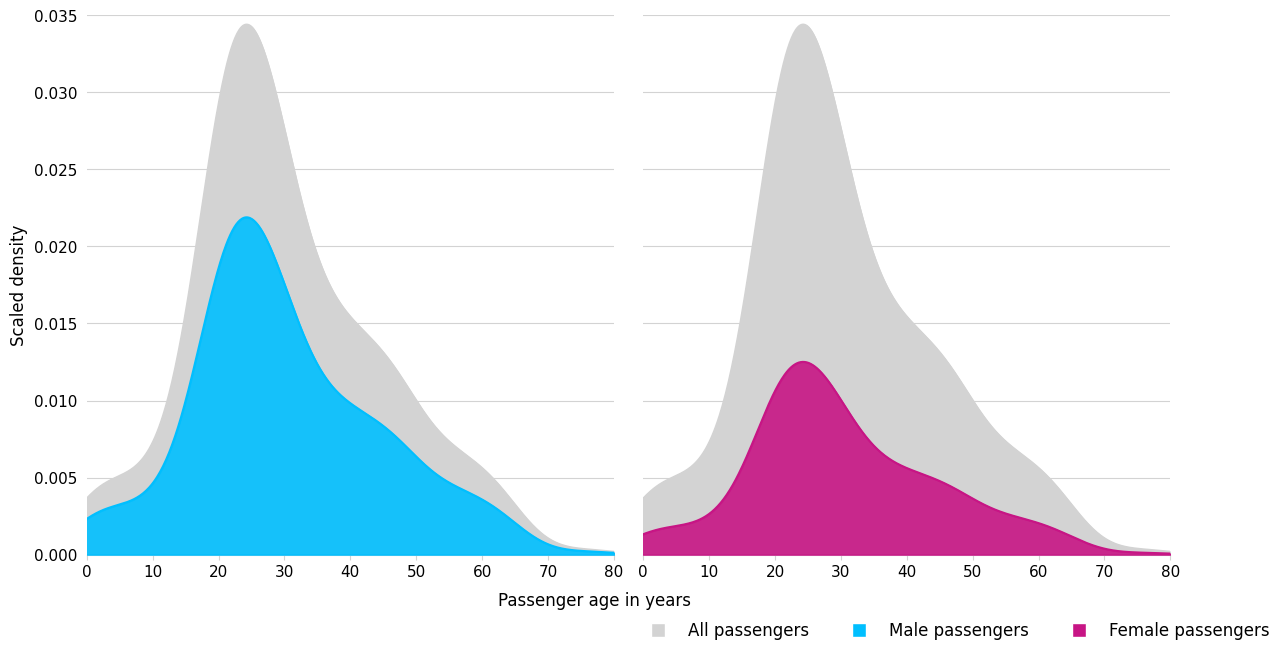

In [72]:
# Calculation
total_passengers = len(data)

# Age dist calculations
all_age_dist = data['Age']
male_passengers = data[data['Sex'] == 'male']
male_age_dist = male_passengers['Age']
female_passengers = data[data['Sex'] == 'female']
female_age_dist = female_passengers['Age']

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)


all_kde_male = all_age_dist.plot.kde(ax=axes[0], color='lightgrey', zorder=1)
x = all_kde_male.get_lines()[0].get_xdata()
y = all_kde_male.get_lines()[0].get_ydata()
axes[0].fill_between(x, y, color='lightgrey', zorder=1)

all_kde_female = all_age_dist.plot.kde(ax=axes[1], color='lightgrey', zorder=1)
x = all_kde_female.get_lines()[0].get_xdata()
y = all_kde_female.get_lines()[0].get_ydata()
axes[1].fill_between(x, y, color='lightgrey', zorder=1)


x_male = all_kde_male.get_lines()[0].get_xdata()
y_male = all_kde_male.get_lines()[0].get_ydata()
scaling_factor_male = male_age_dist.size / all_age_dist.size
y_male_scaled = y_male * scaling_factor_male

axes[0].plot(x_male, y_male_scaled, color='deepskyblue', zorder=3)
axes[0].fill_between(x_male, y_male_scaled, color='deepskyblue', alpha=0.9, zorder=3)

axes[0].grid(True, axis='y', color='lightgrey', zorder=2)
axes[0].set_xlim(0, 80)
axes[0].set_ylim(0, 0.035)

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)
axes[0].spines['bottom'].set_color('lightgrey')

axes[0].tick_params(axis='x', colors='lightgrey')
for label in axes[0].get_xticklabels():
        label.set_color('black')
        label.set_fontsize(11)
axes[0].tick_params(axis='y', which='both', left=False, right=False)
for label in axes[0].get_yticklabels():
        label.set_color('black')
        label.set_fontsize(11)


x_female = all_kde_female.get_lines()[0].get_xdata()
y_female = all_kde_female.get_lines()[0].get_ydata()
scaling_factor_female = female_age_dist.size / all_age_dist.size
y_female_scaled = y_female * scaling_factor_female

axes[1].plot(x_female, y_female_scaled, color='mediumvioletred', zorder=3)
axes[1].fill_between(x_female, y_female_scaled, color='mediumvioletred', alpha=0.9, zorder=3)

axes[1].grid(True, axis='y', color='lightgrey', zorder=2)
axes[1].set_xlim(0, 80)
axes[1].set_ylim(0, 0.035)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_color('lightgrey')

axes[1].tick_params(axis='x', colors='lightgrey')
for label in axes[1].get_xticklabels():
        label.set_color('black')
        label.set_fontsize(11)
axes[1].tick_params(axis='y', which='both', left=False, right=False)
for label in axes[1].get_yticklabels():
        label.set_color('black')
        label.set_fontsize(11)

# Labels and legend
fig.text(0.5, -0.01, 'Passenger age in years', fontsize=12, ha='center', va='center')
axes[0].set_ylabel('Scaled density', fontsize=12) # y-axis label for the left plot

axes[0].plot([], [], color='deepskyblue', label='male passengers')
axes[1].plot([], [], color='mediumvioletred', label='female passengers')
legend_elements = [Line2D([0], [0], marker='s', color='w', markerfacecolor='lightgrey', markersize=10, label='All passengers'),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor='deepskyblue', markersize=10, label='Male passengers'),
                   Line2D([0], [0], marker='s', color='w', markerfacecolor='mediumvioletred', markersize=10, label='Female passengers')]

fig.legend(handles=legend_elements, fontsize=12, loc='lower center', bbox_to_anchor=(0.8, -0.1), frameon=False, ncol=3)

fig.tight_layout(rect=[0, 0.1, 1, 0.95])

plt.tight_layout()
plt.savefig('images/distribution_area.png', bbox_inches='tight')
plt.show()

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/3147942178.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



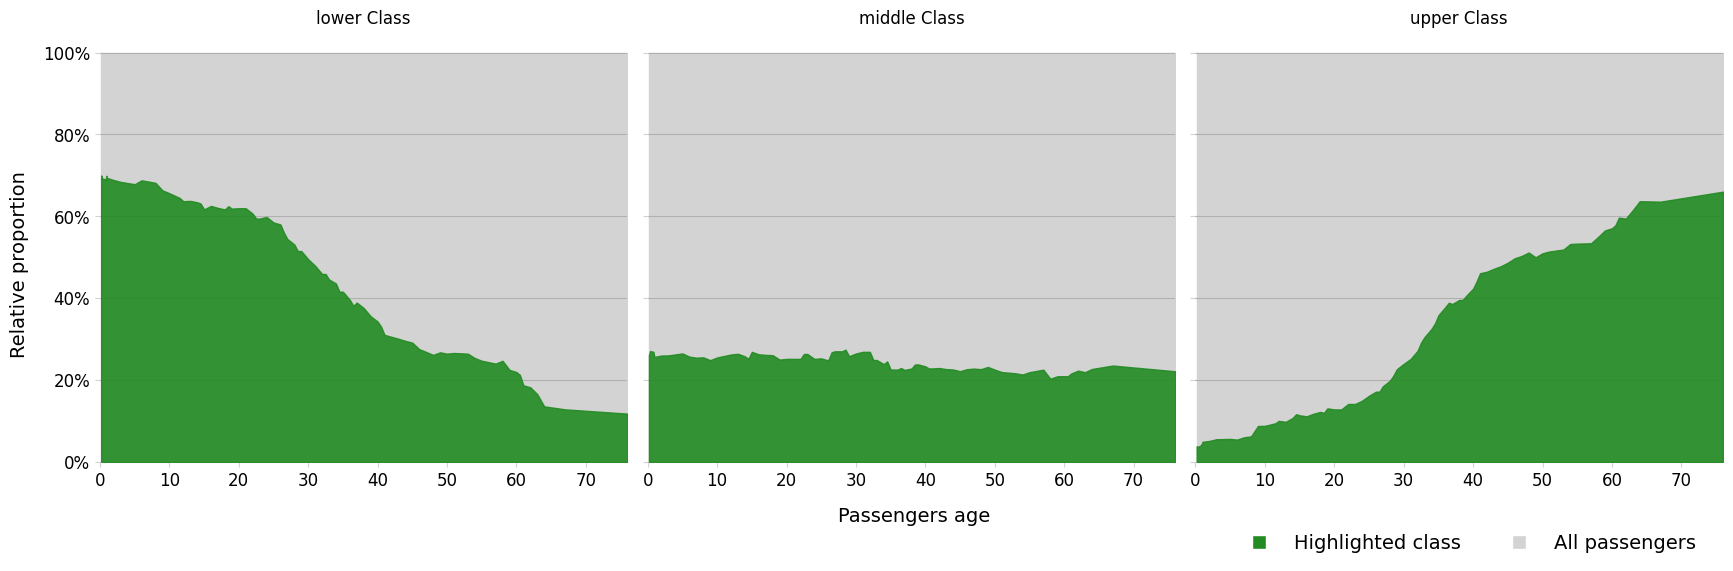

In [73]:
from matplotlib.ticker import FuncFormatter

# Calculate the relative proportion of each Pclass by age
pclass_counts = data.groupby(['Age', 'Pclass']).size().unstack(fill_value=0)
pclass_proportions = pclass_counts.div(pclass_counts.sum(axis=1), axis=0).fillna(0)

window_size = 50 # Increase the window size to make the curve smoother
pclass_proportions_smooth = pclass_proportions.rolling(window=window_size, min_periods=1, center=True).mean()
pclass_proportions_smooth = pclass_proportions_smooth*100

age_bins = pclass_proportions_smooth.index

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
formatter = FuncFormatter(lambda y, _: f'{int(y)}%')

pclasses = ['lower', 'middle', 'upper']

for i, pclass in enumerate(pclasses):
    axes[i].fill_between(age_bins, pclass_proportions_smooth[pclass], color='forestgreen', alpha=0.9, zorder=3)
    axes[i].fill_between(age_bins, pclass_proportions_smooth.sum(axis=1), color='lightgrey', zorder=1)
    axes[i].set_title(f'{pclass} Class')
    axes[i].yaxis.set_major_formatter(formatter)

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_color('lightgrey')

    axes[i].grid(True, axis='y', zorder=2)

    axes[i].set_xlim(0, data['Age'].max())
    axes[i].set_ylim(0, )

    axes[i].tick_params(axis='x', colors='lightgrey')
    axes[i].tick_params(axis='y', colors='lightgrey')

    for label in axes[i].get_xticklabels():
        label.set_color('black')
        label.set_fontsize(12)
    for label in axes[i].get_yticklabels():
        label.set_color('black')
        label.set_fontsize(12)

fig.text(0.04, 0.5, 'Relative proportion', va='center', rotation='vertical', color='black', fontsize=14)
fig.text(0.5, 0.08, 'Passengers age', va='center', color='black', fontsize=14)

# add legend
handles = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='forestgreen', markersize=10, lw=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='lightgrey', markersize=10, lw=10)
]
labels = ['Highlighted class', 'All passengers']
fig.legend(handles=handles, labels=labels, fontsize=14, frameon=False, loc='lower center', bbox_to_anchor=(0.85,-0.01), ncol=2)

# Adjust layout
plt.tight_layout(rect=[0.05, 0.1, 1, 0.95])
plt.savefig('images/relative_proportion_by_age.png', bbox_inches='tight')
plt.show()


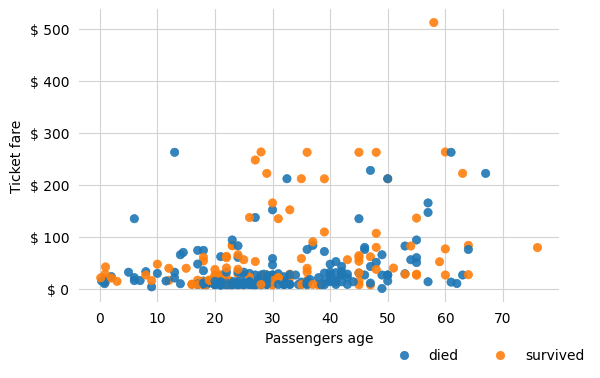

In [74]:
ax = sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived', alpha=0.9, zorder=2, edgecolor=None)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.grid(True, color='lightgrey', zorder=1)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.xlabel('Passengers age')
plt.ylabel('Ticket fare')

formatter = FuncFormatter(lambda y, _: f'$ {int(y)}')
ax.yaxis.set_major_formatter(formatter)

plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(0.85,-0.25), ncol=3)

plt.tight_layout(rect=[0.05, 0.1, 1, 0.95])
plt.savefig('images/scatterplot.png', bbox_inches='tight')
plt.show()

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/3602667334.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



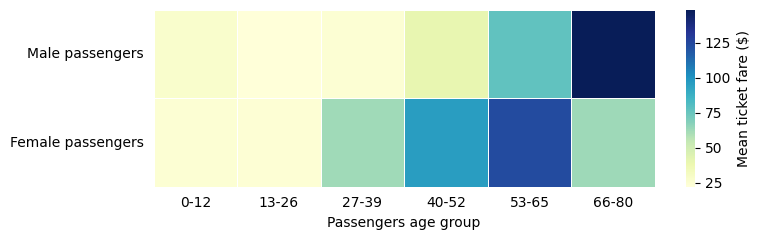

In [75]:
age_bins = pd.cut(data['Age'], bins=6)
heatmap_data = data.pivot_table(index='Sex', columns=age_bins, values='Fare', aggfunc='mean')

plt.figure(figsize=(8, 2.5))
ax = sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Mean ticket fare ($)'}, linewidths=0.5)

age_groups = ['0-12', '13-26', '27-39', '40-52', '53-65', '66-80']
ax.set_xticklabels(age_groups, rotation=0)

ax.invert_yaxis()
ax.set_ylabel('')
sex = ['Female passengers', 'Male passengers']
ax.set_yticklabels(sex, rotation=0)

ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', which='both', left=False, right=False)

plt.xlabel('Passengers age group')

plt.tight_layout()
plt.savefig('images/heatmap.png', bbox_inches='tight')
plt.show()

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/3988674176.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/3988674176.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



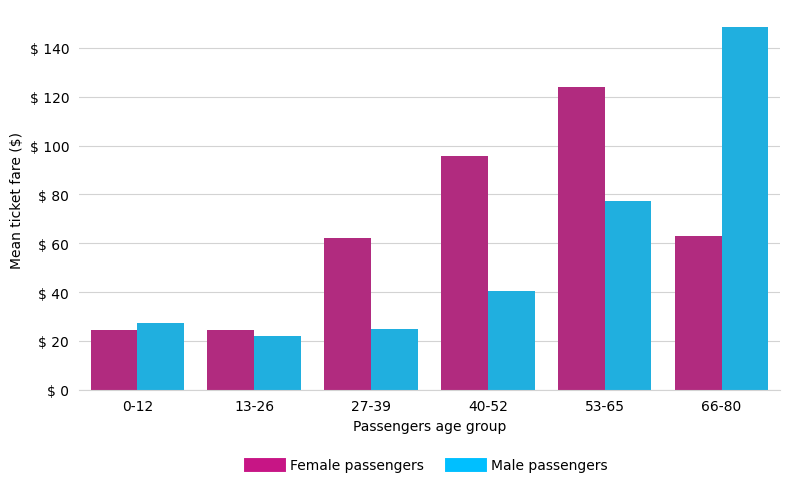

In [76]:
plt.figure(figsize=(8, 5))
colors=['mediumvioletred', 'deepskyblue']
ax = sns.barplot(data=data, x=age_bins, y='Fare', ci=None, hue='Sex', palette=colors, zorder=2)

ax.grid(True, axis='y', color='lightgrey', zorder=0)

ax.tick_params(axis='x', bottom=False)
ax.tick_params(axis='y', left=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('lightgrey')

plt.xlabel('Passengers age group')
ax.set_xticklabels(age_groups)

plt.ylabel('Mean ticket fare ($)')
formatter = FuncFormatter(lambda y, _: f'$ {int(y)}')
ax.yaxis.set_major_formatter(formatter)

custom_handles = [
    plt.Line2D([0], [0], color='mediumvioletred', lw=10),
    plt.Line2D([0], [0], color='deepskyblue', lw=10)
]
plt.legend(custom_handles, ['Female passengers', 'Male passengers'], loc='lower center', bbox_to_anchor=(0.5, -0.25), frameon=False, ncol=2)

plt.tight_layout()
plt.savefig('images/grouped_barplot.png', bbox_inches='tight')
plt.show()

In [77]:
# List for node labels
labels = ['Queenstown', 'Cherbourg', 'Southampton', 
          'Third Class', 'Second Class', 'First Class', 
          'Male', 'Female', 
          'Senior', 'Adult', 'Teen', 'Child',  # Reordered to place Senior at the top
          'Lived', 'Died']

# Node colors
node_colors = ['#1e3d59',  # Queenstown (cyan)
               '#6495ed',  # Cherbourg (light cyan)
               '#add8e6',  # Southampton (light pink)
               '#ff8c00',  # Lower Class (dark orange)
               '#ffa500',  # Middle Class (medium orange)
               '#ffcc66',  # Upper Class (light yellow)
               '#1f77b4',  # Male (bold blue)
               '#ff69b4',  # Female (vibrant pink)
               '#006400',  # Senior (dark green)
               '#32cd32',  # Adult (lime green)
               '#66cdaa',  # Teen (medium green)
               '#7fff00',  # Child (bright green)
               '#2ca02c',  # Survivor (green)
               '#d62728']  # Deceased (red)

# Mapping for nodes because data is unsufficient
mapping = {
    'Queenstown': 'Queenstown',
    'Cherbourg': 'Cherbourg',
    'Southampton': 'Southampton',
    'lower': 'Third Class',
    'middle': 'Second Class',
    'upper': 'First Class',
    'male': 'Male',
    'female': 'Female',
    'child': 'Child',
    'teen': 'Teen',
    'adult': 'Adult',
    'senior': 'Senior',
    'survived': 'Lived',
    'died': 'Died'
}


sources = []
targets = []
values = []

# Flows from Embarkes to Pclass
for embark in ['Queenstown', 'Cherbourg', 'Southampton']:
    for pclass_label in ['lower', 'middle', 'upper']:
        value = len(data[(data['Embarked'] == embark) & (data['Pclass'] == pclass_label)])
        if value > 0:
            sources.append(labels.index(mapping[embark]))  # Embarked index
            targets.append(labels.index(mapping[pclass_label]))  # Class index
            values.append(value)

# Flows from Pclass to Sex
for pclass_label in ['lower', 'middle', 'upper']:
    for sex in ['male', 'female']:
        value = len(data[(data['Pclass'] == pclass_label) & (data['Sex'] == sex)])
        if value > 0:
            sources.append(labels.index(mapping[pclass_label]))  # Class index
            targets.append(labels.index(mapping[sex]))  # Male/Female index
            values.append(value)

# Flows from Sex to AgeGroup
for sex in ['male', 'female']:
    for age_group in ['senior', 'adult', 'teen', 'child']:  # Senior at the top, Child at the bottom
        value = len(data[(data['Sex'] == sex) & (data['AgeGroup'] == age_group)])
        if value > 0:
            sources.append(labels.index(mapping[sex]))  # Male/Female index
            targets.append(labels.index(mapping[age_group]))  # AgeGroup index
            values.append(value)

# Flows from AgeGroup to Survival
for age_group in ['senior', 'adult', 'teen', 'child']:
    for survival in ['survived', 'died']:
        value = len(data[(data['AgeGroup'] == age_group) & (data['Survived'] == survival)])
        if value > 0:
            sources.append(labels.index(mapping[age_group]))  # AgeGroup index
            targets.append(labels.index(mapping[survival]))  # Survived/Deceased index
            values.append(value)

# Color of flows
link_colors = ['rgba(169, 169, 169, 0.6)' for _ in range(len(sources))]  # Matching node colors or custom colors for links

# Create Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors  # Assign custom colors to the nodes
    ),
    link=dict(
        source=sources,  # List of source node indices
        target=targets,  # List of target node indices
        value=values,    # List of flow values
        color=link_colors  # Assign custom colors to the links
    )
))

fig.show()

In [78]:
# Sex vs. Survival
gender_counts = data['Sex'].value_counts()
survival_gender_counts = data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

sex_total_counts = pd.DataFrame({
    'Total': gender_counts,
    'Survived': survival_gender_counts['survived'],
    'Died': survival_gender_counts['died']
})

# AgeGroup vs.  Survival
age_counts = data['AgeGroup'].value_counts()
survival_age_counts = data.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

age_total_counts_ = pd.DataFrame({
    'Total': age_counts,
    'Survived': survival_age_counts['survived'],
    'Died': survival_age_counts['died']
})

# Pclass vs. Survival
pclass_counts = data['Pclass'].value_counts()
survival_pclass_counts = data.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
                                       
pclass_total_counts_ = pd.DataFrame({
    'Total': pclass_counts,
    'Survived': survival_pclass_counts['survived'],
    'Died': survival_pclass_counts['died']
})

# Embarked vs. Survival
embarked_counts = data['Embarked'].value_counts()
survival_embarked_counts = data.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

embarked_total_counts_ = pd.DataFrame({
    'Total': embarked_counts,
    'Survived': survival_embarked_counts['survived'],
    'Died': survival_embarked_counts['died']
})


/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/848314828.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/848314828.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/848314828.py:23: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/x6/cqqdwlr53290_85w55txdpd00000

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/1582043616.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/1582043616.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/x6/cqqdwlr53290_85w55txdpd00000gn/T/ipykernel_3097/1582043616.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/x6/cqqdwlr53290_85w55txdpd0

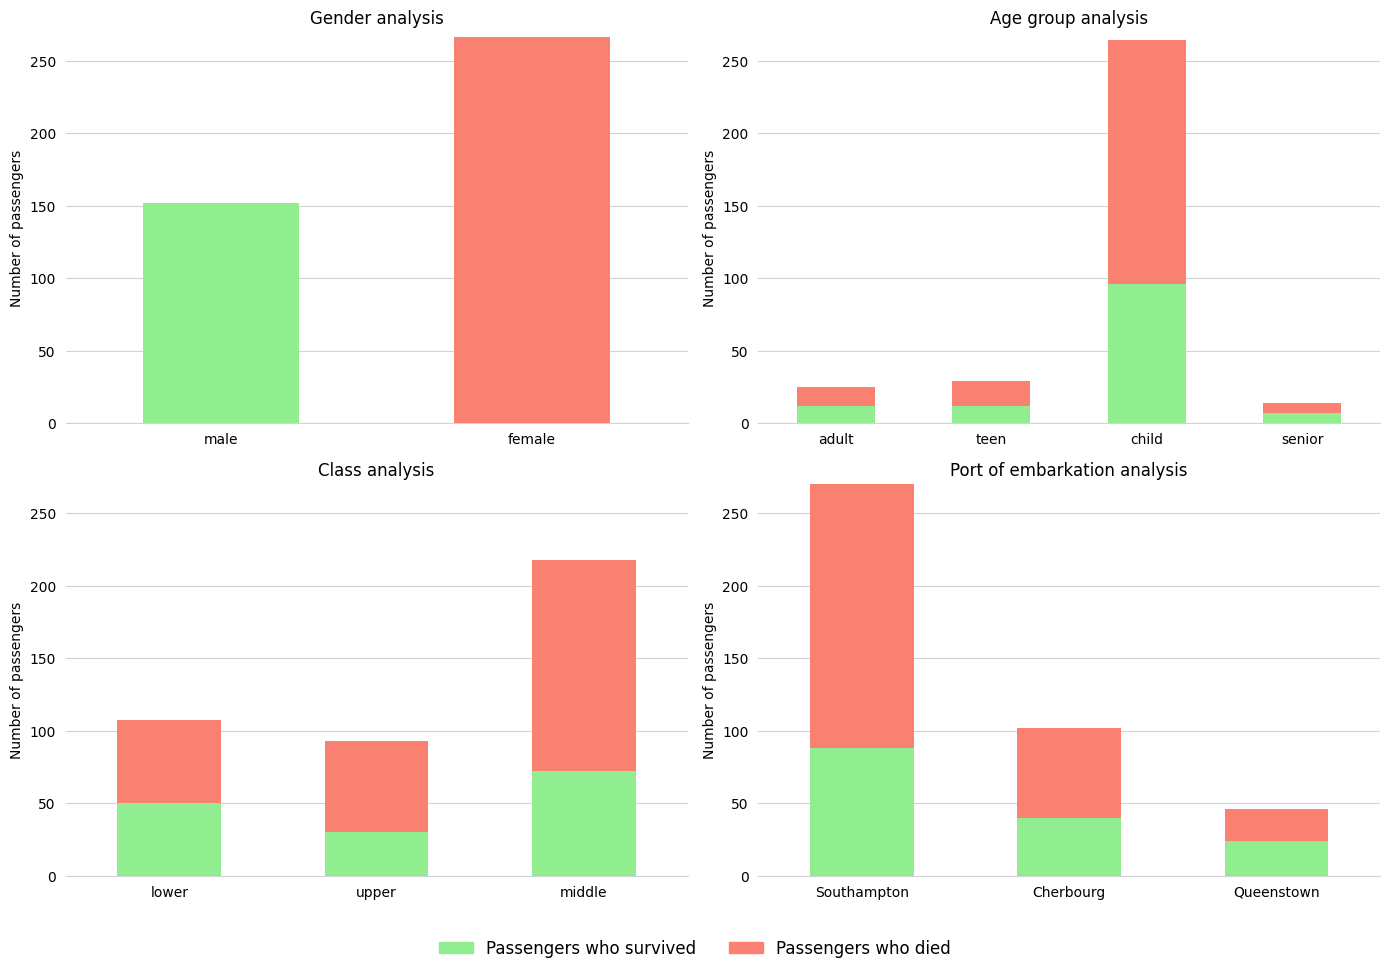

In [110]:
# Define the manual order for each category
sex_order = ['female', 'male']
agegroup_order = ['child', 'teen', 'adult', 'senior']
pclass_order = ['upper', 'middle', 'lower']
embarked_order = ['Southampton', 'Cherbourg', 'Queenstown']

# Set categorical order for each category in the DataFrame
data['Sex'] = pd.Categorical(data['Sex'], categories=sex_order, ordered=True)
data['AgeGroup'] = pd.Categorical(data['AgeGroup'], categories=agegroup_order, ordered=True)
data['Pclass'] = pd.Categorical(data['Pclass'], categories=pclass_order, ordered=True)
data['Embarked'] = pd.Categorical(data['Embarked'], categories=embarked_order, ordered=True)

# Create a function to plot survival counts
def plot_survival(data, category, ax):
    # Prepare the data
    counts = data[category].value_counts()
    survival_counts = data.groupby([category, 'Survived']).size().unstack(fill_value=0)
    
    total_counts = pd.DataFrame({
        'Total': counts,
        'Survived': survival_counts['survived'],
        'Died': survival_counts['died']
    })
    
    # Plot the data
    total_counts[['Survived', 'Died']].plot(kind='bar', stacked=True, ax=ax, color=['lightgreen', 'salmon'], zorder=3, legend=False)

    ax.set_xlabel('')
    ax.set_xticklabels(counts.index, rotation=0)

    ax.set_ylim(0, 270)
    ax.set_ylabel('Number of passengers')

    ax.grid(True, axis='y', color='lightgrey', zorder=0)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('lightgrey')

    ax.tick_params(axis='x', which='both', bottom=False, top=False)
    ax.tick_params(axis='y', which='both', left=False, right=False)

    if category == 'Sex':
        ax.set_title('Gender analysis')
    elif category == 'AgeGroup':
        ax.set_title('Age group analysis')
    elif category == 'Pclass':
        ax.set_title('Class analysis')
    elif category == 'Embarked':
        ax.set_title('Port of embarkation analysis')

# Set up the figure and axes for subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for each category
plot_survival(data, 'Sex', axs[0, 0])
plot_survival(data, 'AgeGroup', axs[0, 1])
plot_survival(data, 'Pclass', axs[1, 0])
plot_survival(data, 'Embarked', axs[1, 1])

handles = [
    plt.Rectangle((0, 0), 1, 1, color='lightgreen', label='Passengers who survived'),
    plt.Rectangle((0, 0), 1, 1, color='salmon', label='Passengers who died')
]
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, title='', frameon=False, fontsize=12)

plt.subplots_adjust(hspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.savefig('images/evaluation2.png', bbox_inches='tight')
plt.show()
